In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import os

In [2]:
#path = r'D:\data\customer_data\Customer Data2' # use your path

df = pd.read_excel('D:\data\customer_data\Customer_Data.xlsx' , sheet_name='Customer Data2')


#all_files = glob.glob(os.path.join(path, "*.csv"))
#df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [3]:
#df = pd.concat([df1, df2], ignore_index=True)
df.head()

,Division,Section,NAME,BILL_DATE,BILL_NO,CUSTOMER_NAME,CUSTOMER_MOBILE,NET_AMT,CREATED BY,BILL_QTY
0,Ladies,Westen Wear,CITIMART - CHOWRINGHEE,2023-07-30,CH/CM/0030711/Jul-23,NaN,NaN,728.4,Abhishek Paul,1
1,Ladies,Westen Wear,CITIMART - CHOWRINGHEE,2023-07-30,CH/CM/0030711/Jul-23,NaN,NaN,728.4,Abhishek Paul,1
2,Kids,Girls,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069596/Jul-23,NaN,NaN,756.0,Sanjay Ghosh,1
3,Kids,Boy,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069596/Jul-23,NaN,NaN,756.0,Sanjay Ghosh,1
4,Kids,Boy,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069596/Jul-23,NaN,NaN,756.0,Sanjay Ghosh,1


In [4]:
np.shape(df)

(617978, 10)

In [5]:
df.columns

Index(['Division', 'Section', 'NAME', 'BILL_DATE', 'BILL_NO', 'CUSTOMER_NAME',
       'CUSTOMER_MOBILE', 'NET_AMT', 'CREATED BY', 'BILL_QTY'],
      dtype='object')

In [6]:
df.loc[df['CUSTOMER_MOBILE'].isna()]

,Division,Section,NAME,BILL_DATE,BILL_NO,CUSTOMER_NAME,CUSTOMER_MOBILE,NET_AMT,CREATED BY,BILL_QTY
0,Ladies,Westen Wear,CITIMART - CHOWRINGHEE,2023-07-30,CH/CM/0030711/Jul-23,NaN,NaN,728.40,Abhishek Paul,1
1,Ladies,Westen Wear,CITIMART - CHOWRINGHEE,2023-07-30,CH/CM/0030711/Jul-23,NaN,NaN,728.40,Abhishek Paul,1
2,Kids,Girls,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069596/Jul-23,NaN,NaN,756.00,Sanjay Ghosh,1
3,Kids,Boy,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069596/Jul-23,NaN,NaN,756.00,Sanjay Ghosh,1
4,Kids,Boy,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069596/Jul-23,NaN,NaN,756.00,Sanjay Ghosh,1
...,...,...,...,...,...,...,...,...,...,...
617973,CMO,Mens (CMO),CITIMART - CHOWRINGHEE,2023-10-15,CH/CM/0054623/Oct-23,NaN,NaN,2296.00,Subhojit Sengupta,2
617974,Mens,T-Shirts,CITIMART - CHOWRINGHEE,2023-10-15,CH/CM/0054623/Oct-23,NaN,NaN,2296.00,Subhojit Sengupta,1
617975,Home Decor,Others,CITIMART - CHOWRINGHEE,2023-11-25,CH/CM/0063994/Nov-23,NaN,NaN,149.75,Akash Debnath,1
617976,Home Decor,Others,CITIMART - HATIBAGAN,2023-08-11,HB/CM/0029716/Aug-23,NaN,NaN,219.00,jayanta,1


In [7]:
df = df.dropna(subset=['CUSTOMER_MOBILE']) ## dropping blank customer ids

In [8]:
np.shape(df)

(44626, 10)

In [9]:
df.describe()

,BILL_DATE,CUSTOMER_MOBILE,NET_AMT,BILL_QTY
count,44626,4.462600e+04,44626.000000,44626.000000
mean,2023-09-07 13:27:13.254156544,9.369188e+09,2118.055580,1.108838
min,2023-06-16 00:00:00,1.000000e+08,0.000000,-2.000000
25%,2023-07-24 00:00:00,7.980589e+09,599.000000,1.000000
50%,2023-09-03 00:00:00,8.961050e+09,1245.000000,1.000000
75%,2023-09-28 00:00:00,9.674474e+09,2675.000000,1.000000
max,2023-12-19 00:00:00,8.804736e+12,22188.900000,24.000000
std,NaN,8.326389e+10,2532.147241,0.502373


In [10]:
df.isnull().sum()

Division           0
Section            0
NAME               0
BILL_DATE          0
BILL_NO            0
CUSTOMER_NAME      0
CUSTOMER_MOBILE    0
NET_AMT            0
CREATED BY         0
BILL_QTY           0
dtype: int64

In [11]:
# creating a column to flag cancellations

df['Cancellation_Flag'] = df['BILL_QTY'].apply(lambda x: 1 if str(x).startswith('-') else 0)

In [12]:
df.dtypes

Division                     object
Section                      object
NAME                         object
BILL_DATE            datetime64[ns]
BILL_NO                      object
CUSTOMER_NAME                object
CUSTOMER_MOBILE             float64
NET_AMT                     float64
CREATED BY                   object
BILL_QTY                      int64
Cancellation_Flag             int64
dtype: object

In [13]:
df.head()

,Division,Section,NAME,BILL_DATE,BILL_NO,CUSTOMER_NAME,CUSTOMER_MOBILE,NET_AMT,CREATED BY,BILL_QTY,Cancellation_Flag
19,Accoessories,Gift & Novelties,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9.163208e+09,231.0,Cashier One,1,0
20,House Hold Appliences,Plasticware,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9.163208e+09,231.0,Cashier One,1,0
21,Packing,P.P.,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9.163208e+09,231.0,Cashier One,1,0
41,Kids,Boy,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8.420643e+09,299.0,Sankar Prasad Ghosh,1,0
42,Packing,P.P.,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8.420643e+09,299.0,Sankar Prasad Ghosh,1,0


In [14]:
df['Net_Sales']=df.apply(lambda row: row['BILL_QTY'] * row['NET_AMT'], axis=1)

In [15]:
df.to_excel('cleaned_data.xlsx')

C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\3145061856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BILL_QTY'], kde=True)  # Use histplot for a histogram with KDE
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\3145061856.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

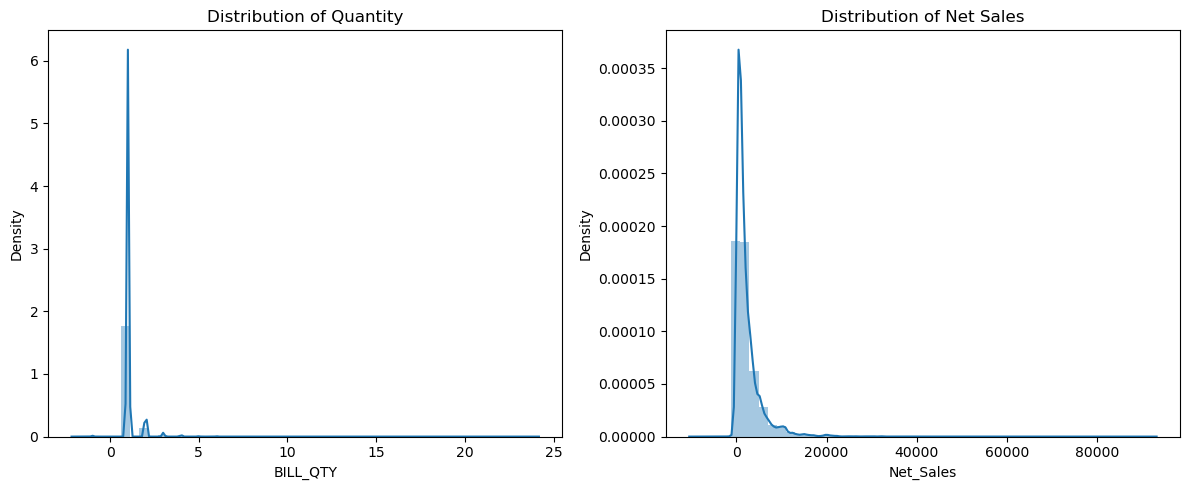

In [16]:
plt.figure(figsize=(12, 5))

# Plot the distribution of the first column
plt.subplot(1, 2, 1)
sns.distplot(df['BILL_QTY'], kde=True)  # Use histplot for a histogram with KDE
plt.title('Distribution of Quantity')

# Plot the distribution of the second column
plt.subplot(1, 2, 2)
sns.distplot(df['Net_Sales'], kde=True)  # Use histplot for a histogram with KDE
plt.title('Distribution of Net Sales')

# Show the plots
plt.tight_layout()
plt.show()

In [17]:
# df['Year'] = df['InvoiceDate'].dt.year
# df['Month'] = df['InvoiceDate'].dt.month
# df['Day'] = df['InvoiceDate'].dt.day
# df['Week_Number'] = df['InvoiceDate'].dt.week
# df['Day_of_Week'] = df['InvoiceDate'].dt.day_name()

In [18]:
df.head(8)

,Division,Section,NAME,BILL_DATE,BILL_NO,CUSTOMER_NAME,CUSTOMER_MOBILE,NET_AMT,CREATED BY,BILL_QTY,Cancellation_Flag,Net_Sales
19,Accoessories,Gift & Novelties,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9.163208e+09,231.0,Cashier One,1,0,231.0
20,House Hold Appliences,Plasticware,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9.163208e+09,231.0,Cashier One,1,0,231.0
21,Packing,P.P.,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9.163208e+09,231.0,Cashier One,1,0,231.0
41,Kids,Boy,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8.420643e+09,299.0,Sankar Prasad Ghosh,1,0,299.0
42,Packing,P.P.,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8.420643e+09,299.0,Sankar Prasad Ghosh,1,0,299.0
46,Ladies,Westen Wear,CITIMART - GARIAHAT,2023-06-24,GH/CM/0004821/Jun-23,sushila kumari,8.298671e+09,627.0,Nantu Maity,1,0,627.0
47,Home Decor,Others,CITIMART - GARIAHAT,2023-06-24,GH/CM/0004821/Jun-23,sushila kumari,8.298671e+09,627.0,Nantu Maity,1,0,627.0
48,Ladies,Westen Wear,CITIMART - GARIAHAT,2023-06-24,GH/CM/0004821/Jun-23,sushila kumari,8.298671e+09,627.0,Nantu Maity,1,0,627.0


In [19]:
df2=pd.read_excel('cleaned_data.xlsx', index_col=0)

In [20]:
df2.head()

,Division,Section,NAME,BILL_DATE,BILL_NO,CUSTOMER_NAME,CUSTOMER_MOBILE,NET_AMT,CREATED BY,BILL_QTY,Cancellation_Flag,Net_Sales
19,Accoessories,Gift & Novelties,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9163208130,231.0,Cashier One,1,0,231.0
20,House Hold Appliences,Plasticware,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9163208130,231.0,Cashier One,1,0,231.0
21,Packing,P.P.,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9163208130,231.0,Cashier One,1,0,231.0
41,Kids,Boy,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8420642521,299.0,Sankar Prasad Ghosh,1,0,299.0
42,Packing,P.P.,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8420642521,299.0,Sankar Prasad Ghosh,1,0,299.0


In [21]:
#RFM Analysis

# Convert 'InvoiceDate' to datetime
df2['BILL_DATE'] = pd.to_datetime(df2['BILL_DATE'])

In [22]:
import datetime as dt
snapshot_date = max(df2.BILL_DATE) + dt.timedelta(days=1)

In [23]:
# RFM table
# Aggregate data by each customer
rfm = df2.groupby('CUSTOMER_MOBILE').agg({'BILL_DATE': lambda x: (snapshot_date - x.max()).days, 'BILL_NO': lambda x: len(x), 'Net_Sales': lambda x: x.sum()}).reset_index()
rfm['BILL_DATE'] = rfm['BILL_DATE'].astype(int)
# Rename columns
rfm.rename(columns={'BILL_DATE': 'Recency', 
                         'BILL_NO': 'Frequency', 
                         'Net_Sales': 'MonetaryValue'}, inplace=True)

In [24]:
rfm.head()

,CUSTOMER_MOBILE,Recency,Frequency,MonetaryValue
0,100000000,5,1,449.0
1,130422907,172,2,2097.0
2,163028704,5,4,12520.0
3,170367504,2,2,2160.0
4,171659757,4,7,50265.0


C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\1403536182.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\1403536182.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distp

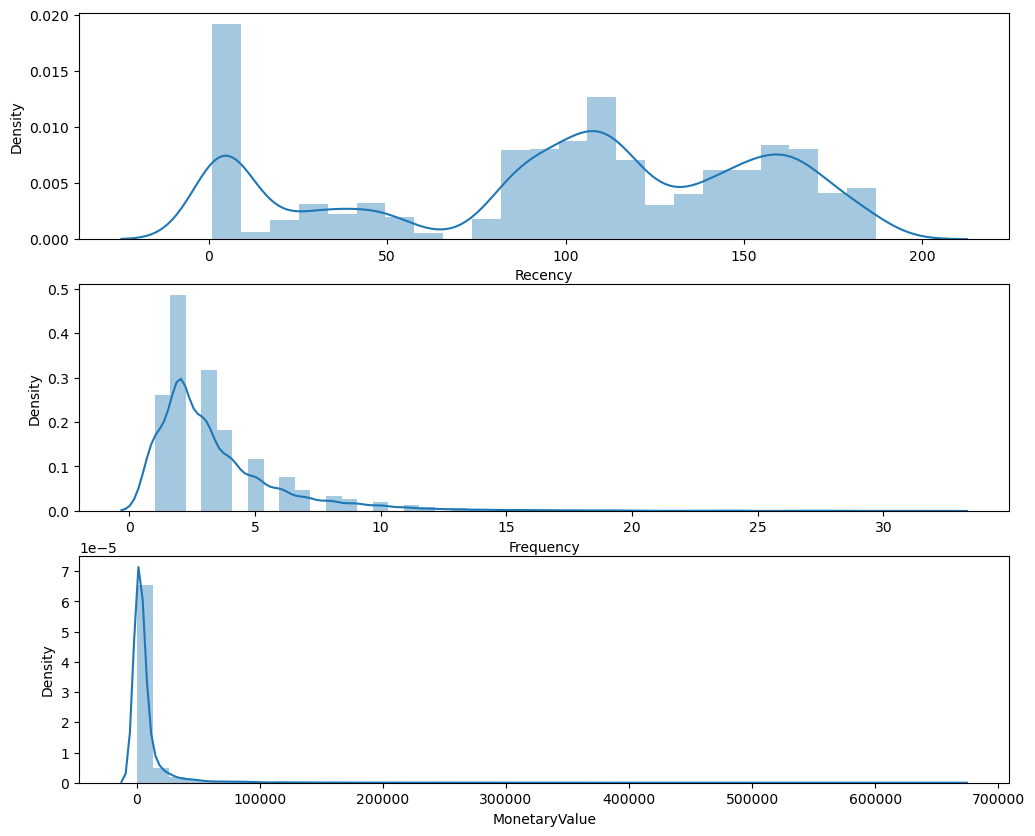

In [25]:
plt.figure(figsize=(12,10))  ## check for skewness

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])

# Show the plot
plt.show()

In [26]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    print('Log Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.log(rfm[x]).skew().round(2))
    print('Square Root Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.sqrt(rfm[x]).skew().round(2))
    print('Box-Cox Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\3886813011.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[x], ax=ax[0,0])
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\3886813011.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm[x]), ax=ax[0,1])
C:\Users

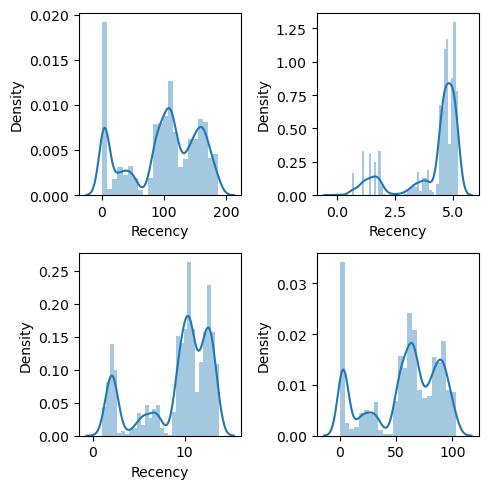

Log Transform : The skew coefficient of -0.45 to -1.54
Square Root Transform : The skew coefficient of -0.45 to -0.98
Box-Cox Transform : The skew coefficient of -0.45 to -0.59


In [27]:
analyze_skewness('Recency')

C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\3886813011.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[x], ax=ax[0,0])
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\3886813011.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm[x]), ax=ax[0,1])
C:\Users

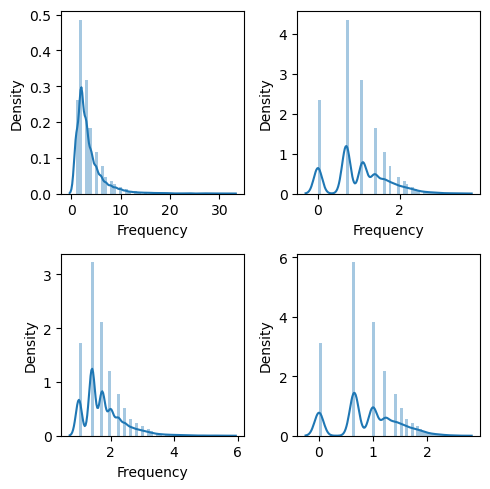

Log Transform : The skew coefficient of 2.94 to 0.32
Square Root Transform : The skew coefficient of 2.94 to 1.38
Box-Cox Transform : The skew coefficient of 2.94 to 0.02


In [28]:
analyze_skewness('Frequency')

C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\1526302456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['MonetaryValue'], ax=ax[0])
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_7200\1526302456.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.cbrt(rfm['MonetaryVal

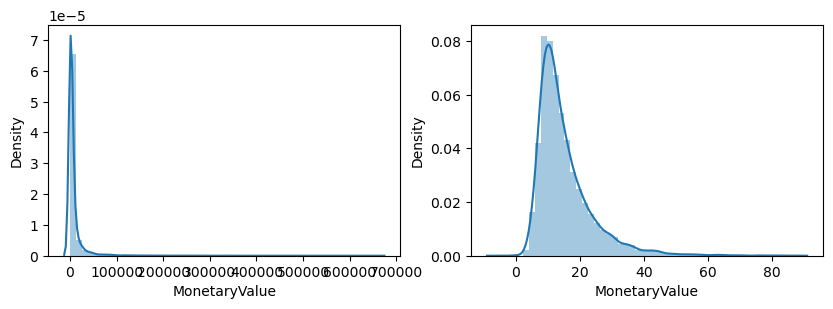

11.12
2.22


In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(rfm['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(rfm['MonetaryValue']), ax=ax[1])
plt.show()
print(rfm['MonetaryValue'].skew().round(2))
print(np.cbrt(rfm['MonetaryValue']).skew().round(2))

In [30]:
## Transforming RFM table with box-cox and cubic root

from scipy import stats
df_transformed = pd.DataFrame()
df_transformed["Recency"] = stats.boxcox(rfm['Recency'])[0]
df_transformed["Frequency"] = stats.boxcox(rfm['Frequency'])[0]
df_transformed["MonetaryValue"] = pd.Series(np.cbrt(rfm['MonetaryValue'])).values
df_transformed.tail()

,Recency,Frequency,MonetaryValue
12604,2.665183,0.000000,5.748897
12605,1.826865,0.651397,16.256289
12606,2.665183,1.225932,9.582840
12607,4.260319,0.996201,24.983456
12608,64.273037,0.000000,15.599430


In [31]:
df_transformed.describe()

,Recency,Frequency,MonetaryValue
count,12609.000000,12609.000000,12609.000000
mean,57.518187,0.904221,15.235043
std,30.942647,0.548098,8.721088
min,0.000000,0.000000,-5.078753
25%,32.919593,0.651397,9.582840
50%,63.757136,0.996201,12.756821
75%,83.436427,1.225932,18.263610
max,102.860784,2.573830,87.159227


In [32]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(df_transformed)
df_normalized = scaler.transform(df_transformed)

In [33]:
pd.DataFrame(df_normalized).head()

,0,1,2
0,-1.746658,-1.649810,-0.868920
1,1.232483,-0.461294,-0.279260
2,-1.746658,0.586981,0.915664
3,-1.828323,-0.461294,-0.264706
4,-1.772802,1.342356,2.484908


In [34]:
print(df_normalized.mean(axis = 0).round(2)) 
print(df_normalized.std(axis = 0).round(2))

[ 0. -0.  0.]
[1. 1. 1.]


In [35]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [36]:
#!pip install threadpoolctl==3.1.0

In [37]:
#os.environ['OMP_NUM_THREADS']='1'

In [38]:
#!pip install numpy
#!pip install scikit-learn

In [92]:
!pip install threadpoolctl -U

  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0


D:\Users\House of Musa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


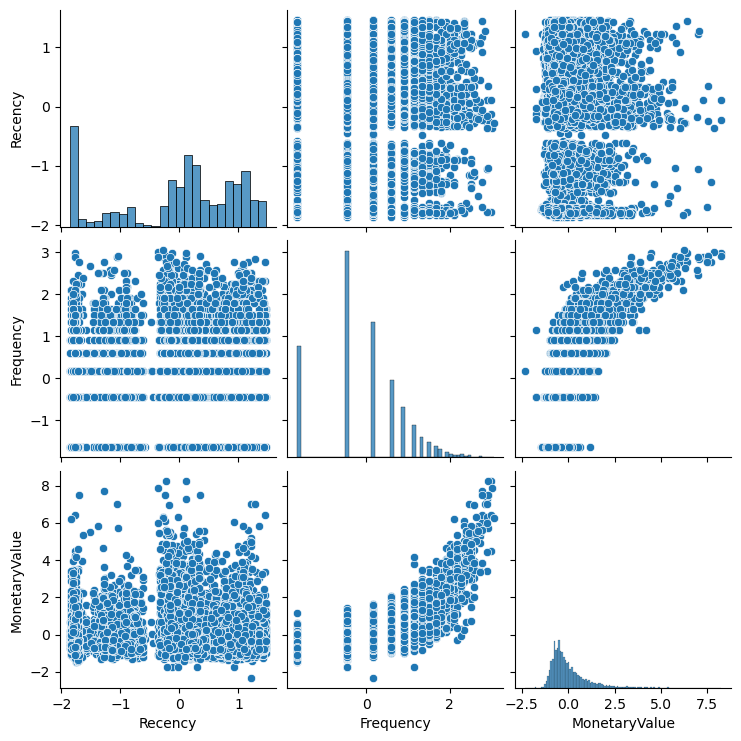

In [39]:
data = pd.DataFrame(data = df_normalized, columns = ['Recency', 'Frequency', 'MonetaryValue'])
sns.pairplot(data) # Create a matrix scatterplot

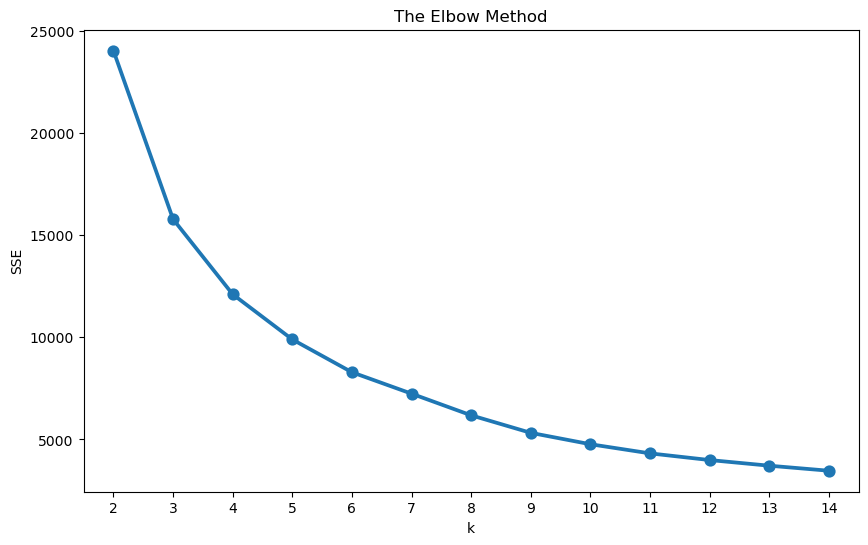

In [40]:
## Finding optimal K

plt.figure(figsize=(10,6))
K = range(2, 15)
distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    
    distortions.append(sum(np.min(cdist(df_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / df_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / df_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [41]:
## method 2: silhoutte score.. the higher the better

from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9] # Number of clusters
for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_normalized)
    
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.35514943135649657
For n_clusters = 3 The average silhouette_score is : 0.4062783934686046
For n_clusters = 4 The average silhouette_score is : 0.36019717937802664
For n_clusters = 5 The average silhouette_score is : 0.3694073466578239
For n_clusters = 6 The average silhouette_score is : 0.3786695793608171
For n_clusters = 7 The average silhouette_score is : 0.37797762044100663
For n_clusters = 8 The average silhouette_score is : 0.39405034250255777
For n_clusters = 9 The average silhouette_score is : 0.3887131003148327


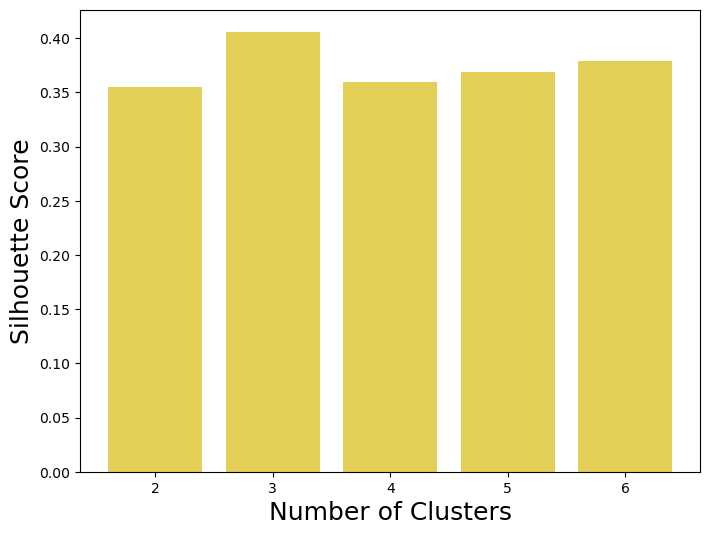

In [42]:
# Silhouette scores for different numbers of clusters
n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = [0.355, 0.406, 0.360, 0.369, 0.379]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(n_clusters, silhouette_scores, color='#E3CF57')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Silhouette Score', fontsize=18)
#plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(n_clusters)
plt.show()

In [43]:
## method 3: gap statistics to find optimal clusters...the higher, the better

%matplotlib inline
import time
import hashlib
import scipy

def optimalK(data, nrefs, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf._append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, 
                                                       #index 2 = 3 clusters are optimal

In [44]:
k, gapdf = optimalK(df_normalized, nrefs=3, maxClusters=10)

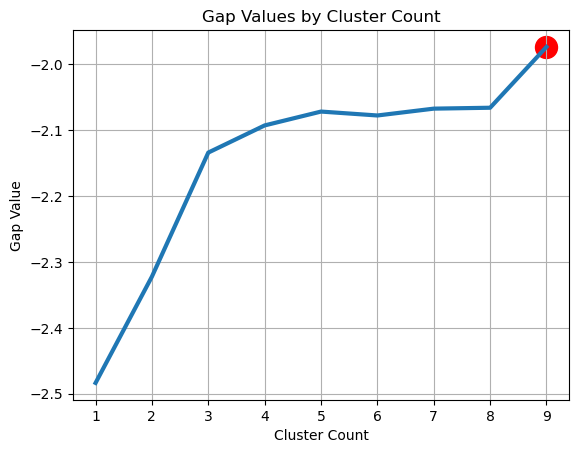

In [45]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

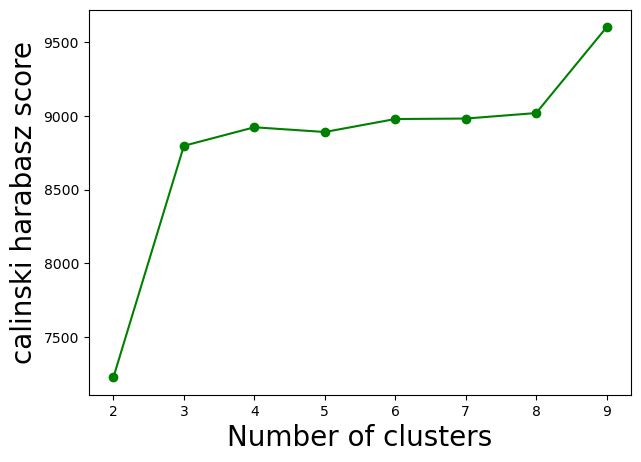

In [46]:
## method 4: calinski_harabasz_score...the higher, the better

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

num_clusters=[]
ch_score=[]

for k in range(2, 10):
    num_clusters.append(k)
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_normalized)
    labels = kmeans_model.labels_
    ch_score.append(calinski_harabasz_score(df_normalized, labels))
    

plt.figure(figsize=(7,5))
plt.plot(num_clusters, ch_score, '-o', color='green')
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('calinski harabasz score',fontsize=20)
plt.show()

Text(0, 0.5, 'davies bouldin score')

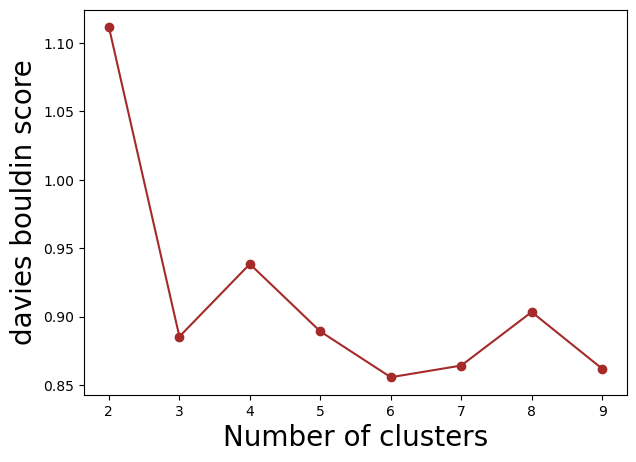

In [47]:
## method 5: davies boulding score..the closer to 0, the better

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score 

num_clusters=[]
db_score=[]

for k in range(2, 10):
    num_clusters.append(k)
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_normalized)
    labels = kmeans_model.labels_
    db_score.append(davies_bouldin_score(df_normalized, labels))
    
plt.figure(figsize=(7,5))
plt.plot(num_clusters, db_score, '-o', color='brown')
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('davies bouldin score',fontsize=20)

In [48]:
## fit the model

model = KMeans(n_clusters=4, random_state=42)
model.fit(df_normalized)
model.labels_.shape
rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         128.2       4.2        5466.3  4275
1          16.6       2.1        2539.7  2816
2         129.6       1.8        1081.8  4111
3          87.6       9.4       51160.7  1407

In [49]:
df_rfm=rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean']}).round(1)
df_rfm

,Recency,Frequency,MonetaryValue
,mean,mean,mean
Cluster,,,
0,128.2,4.2,5466.3
1,16.6,2.1,2539.7
2,129.6,1.8,1081.8
3,87.6,9.4,51160.7


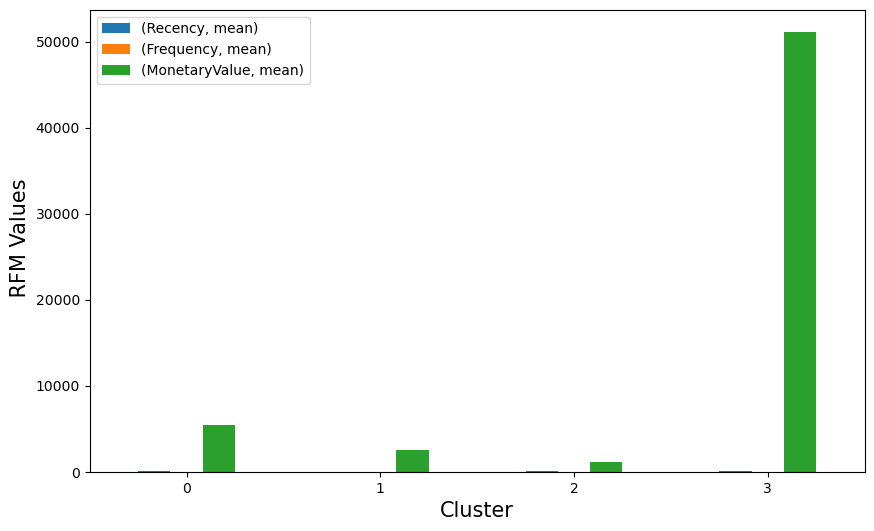

In [50]:
# Create a bar chart color-coded with clusters
ax = df_rfm.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.xlabel('Cluster', fontsize=15)
plt.ylabel(' RFM Values', fontsize=15)
plt.xticks(rotation=0)
#plt.title('Cluster Analysis')
plt.legend()
# Show the plot
plt.show()

In [51]:
rfm.head()

,CUSTOMER_MOBILE,Recency,Frequency,MonetaryValue,Cluster
0,100000000,5,1,449.0,1
1,130422907,172,2,2097.0,2
2,163028704,5,4,12520.0,1
3,170367504,2,2,2160.0,1
4,171659757,4,7,50265.0,3


In [52]:
data = pd.DataFrame(data = df_normalized, columns = ['Recency', 'Frequency', 'MonetaryValue'])
data["Cluster"] = model.labels_

D:\Users\House of Musa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


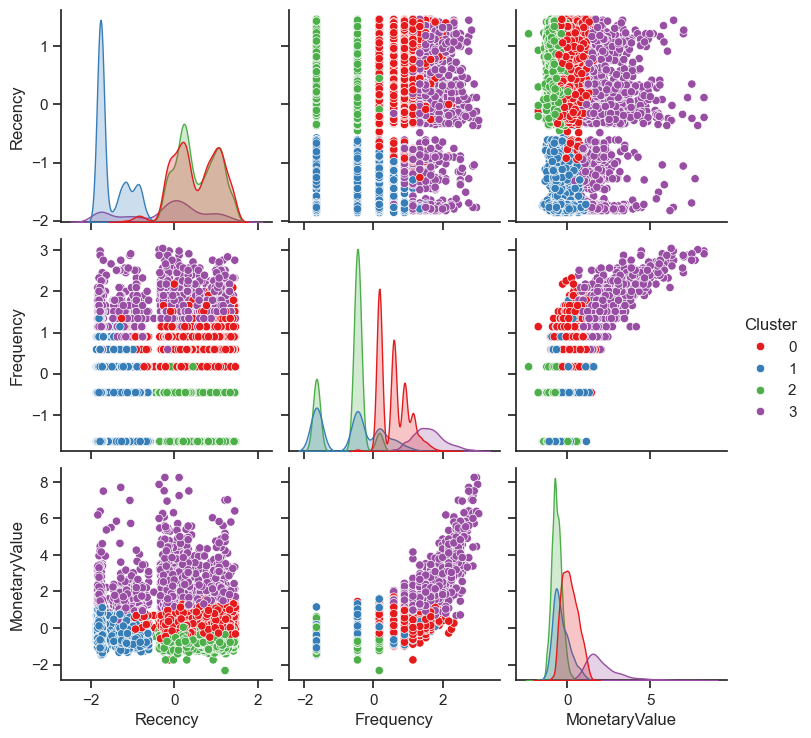

In [53]:
# Set the style and color palette
sns.set(style="ticks")
palette = "Set1"

# Create the pairplot
sns.pairplot(data, hue="Cluster", palette=palette, diag_kind="kde")

# Show the pairplot
plt.show()


In [54]:
cluster_avg = rfm[['Cluster','Recency','Frequency','MonetaryValue']].groupby(['Cluster']).mean()
population_avg = rfm[['Recency','Frequency','MonetaryValue']].head().mean()

In [55]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,2.41,0.31,-0.60
1,-0.56,-0.33,-0.81
2,2.45,-0.43,-0.92
3,1.33,1.93,2.79


<Axes: title={'center': 'Relative importance of attributes'}, ylabel='Cluster'>

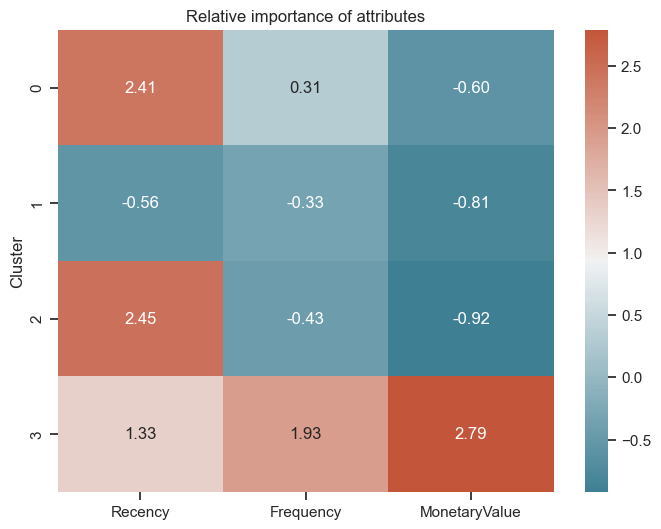

In [56]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 6))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)

In [57]:
# Create a mapping dictionary from df1
mapping_dict = rfm.set_index("CUSTOMER_MOBILE")["Cluster"].to_dict()

# Map cluster numbers from df1 to df2 based on Customer ID
df2["Segment"] = df2["CUSTOMER_MOBILE"].map(mapping_dict)

In [58]:
len(df2['Cancellation_Flag'].loc[(df2['Segment']==1) & (df2['Cancellation_Flag']==1)])/len(df2['Cancellation_Flag'].loc[df2['Segment']==1])

0.0001666944490748458

In [59]:
# Group the data by 'Segment' and 'Cancellation Flag' and calculate the percentage
result_df = df2.groupby(['Segment', 'Cancellation_Flag']).size().unstack(fill_value=0)
result_df['Percentage of Cancellations'] = (result_df[1] / result_df.sum(axis=1)) * 100

# Reset the index to have 'Segment' and 'Cancellation Flag' as regular columns
#result_df = result_df.reset_index()

In [60]:
result_df

Cancellation_Flag,0,1,Percentage of Cancellations
Segment,,,
0,17937,46,0.255797
1,5998,1,0.016669
2,7454,10,0.133976
3,13148,32,0.242792


In [61]:
df2.head()

,Division,Section,NAME,BILL_DATE,BILL_NO,CUSTOMER_NAME,CUSTOMER_MOBILE,NET_AMT,CREATED BY,BILL_QTY,Cancellation_Flag,Net_Sales,Segment
19,Accoessories,Gift & Novelties,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9163208130,231.0,Cashier One,1,0,231.0,2
20,House Hold Appliences,Plasticware,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9163208130,231.0,Cashier One,1,0,231.0,2
21,Packing,P.P.,CITIMART - NEW MARKET,2023-07-30,NM/CM/0069603/Jul-23,S Dey,9163208130,231.0,Cashier One,1,0,231.0,2
41,Kids,Boy,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8420642521,299.0,Sankar Prasad Ghosh,1,0,299.0,2
42,Packing,P.P.,CITIMART - NEW MARKET,2023-06-24,NM/CM/0051527/Jun-23,A Kadir,8420642521,299.0,Sankar Prasad Ghosh,1,0,299.0,2


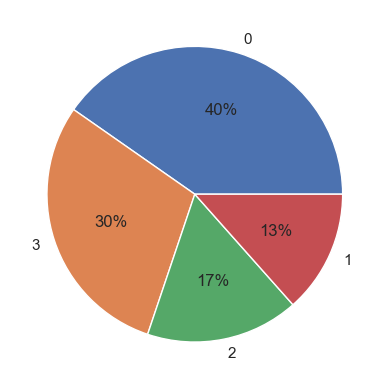

In [62]:
plt.pie(df2.Segment.value_counts(),
        labels=df2.Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [63]:
## segment interpretation
#cluster 0: at risk customer
#cluster 1: new customers
#cluster 2: lost customers 
#cluster 3: loyal customers